In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("fl.csv")

In [ ]:
df

,Product Name,Prices,Description,Reviews
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,"Nothing Phone (2a) 5G (Black, 128 GB)","₹23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
4,"Apple iPhone 14 Plus ((PRODUCT)RED, 512 GB)","₹96,999",512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
...,...,...,...,...
305,Nokia 105 ss,"₹1,349",4 MB RAM | 4 MB ROM4.57 cm (1.8 inch) Quarter ...,4.2
306,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN
308,NaN,"₹81,999",NaN,4.6


In [ ]:
df.shape

(310, 4)

In [ ]:
print(df.isnull().sum())

Product Name    70
Prices          60
Description     70
Reviews         69
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(231, 4)

In [ ]:
df

,Product Name,Prices,Description,Reviews
0,"Nothing Phone (2a) 5G (Black, 128 GB)","₹23,999",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
1,"Apple iPhone 14 Plus ((PRODUCT)RED, 512 GB)","₹96,999",512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
2,"Apple iPhone 14 Plus (Midnight, 512 GB)","₹96,999",512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
3,"Apple iPhone 14 Plus (Yellow, 512 GB)","₹96,999",512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
4,"Apple iPhone 14 Plus (Starlight, 512 GB)","₹96,999",512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
...,...,...,...,...
226,Jio PRIMA 4G,"₹2,870",500 MB RAM | 4 GB ROM6.1 cm (2.4 inch) Display...,3.9
227,"REDMI 12 5G (Pastel Blue, 128 GB)","₹12,718",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
228,"realme Narzo N53 (Feather Gold, 128 GB)","₹10,490",8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) HD+ ...,4.2
229,"Apple iPhone 15 Plus (Black, 128 GB)","₹81,999",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 3 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  231 non-null    object 
 1   Prices        231 non-null    object 
 2   Description   231 non-null    object 
 3   Reviews       231 non-null    float64
dtypes: float64(1), object(3)
memory usage: 9.0+ KB
None


In [ ]:
df['Reviews'].describe()

count    231.000000
mean       4.283117
std        0.174008
min        3.700000
25%        4.200000
50%        4.300000
75%        4.400000
max        4.800000
Name: Reviews, dtype: float64

In [ ]:
df['Prices'] = df['Prices'].str.replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
df['Prices'].describe()

count      231.000000
mean     20993.207792
std      25756.570385
min        845.000000
25%       7999.000000
50%      11999.000000
75%      23584.000000
max      99999.000000
Name: Prices, dtype: float64

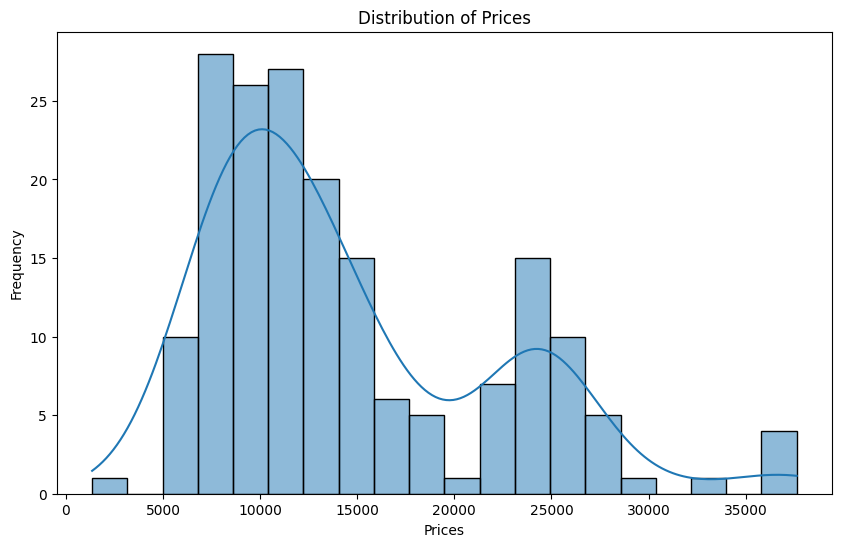

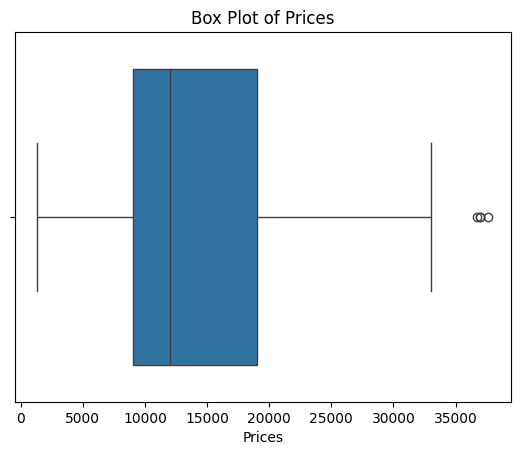

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Prices'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Prices', data=df)
plt.title('Box Plot of Prices')
plt.show()

In [ ]:
Q1 = df['Prices'].quantile(0.25)
Q3 = df['Prices'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Prices'] >= lower_bound) & (df['Prices'] <= upper_bound)]
df

,Product Name,Prices,Description,Reviews
3,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
34,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2
35,POCO C51 - Locked with Airtel Prepaid (Power B...,4999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.0
36,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4
37,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2
...,...,...,...,...
300,"OnePlus Nord 3 5G (Misty Green, 128 GB)",24065.0,8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) Disp...,4.4
301,Jio PRIMA 4G,2870.0,500 MB RAM | 4 GB ROM6.1 cm (2.4 inch) Display...,3.9
302,"REDMI 12 5G (Pastel Blue, 128 GB)",12718.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3
303,"realme Narzo N53 (Feather Gold, 128 GB)",10490.0,8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) HD+ ...,4.2


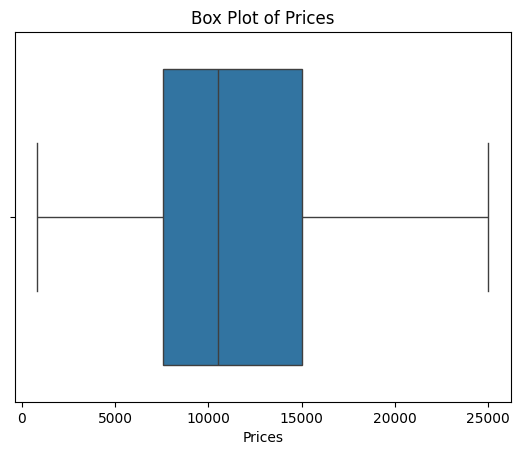

In [ ]:
sns.boxplot(x='Prices', data=df)
plt.title('Box Plot of Prices')
plt.show()

In [ ]:
df['Prices'].describe()

count      194.000000
mean     11601.536082
std       6762.330643
min        845.000000
25%       7549.000000
50%      10538.500000
75%      14999.000000
max      24999.000000
Name: Prices, dtype: float64

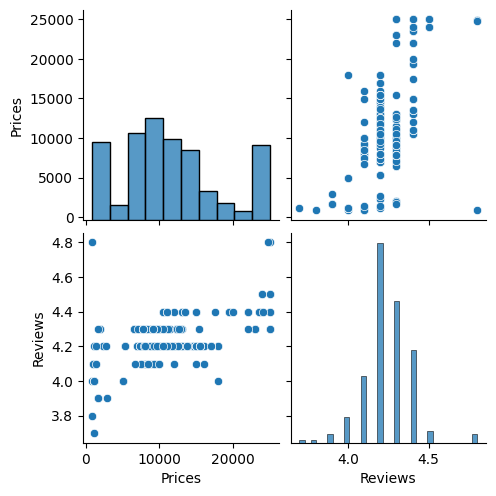

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df['RAM'] = df['Description'].str.extract('(\d+ GB) RAM', expand=False)
df['ROM'] = df['Description'].str.extract('(\d+ GB) ROM', expand=False)
df['Display Size'] = df['Description'].str.extract(r'(\d+\.?\d*) (?:inch|cm)')

# Convert extracted strings to numeric values
df['RAM'] = df['RAM'].str.replace(' GB', '').astype(float)
df['ROM'] = df['ROM'].str.replace(' GB', '').astype(float)
df['Display Size'] = df['Display Size'].astype(float)

df


,Product Name,Prices,Description,Reviews,RAM,ROM,Display Size
3,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,8.0,128.0,17.02
34,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2,8.0,128.0,16.51
35,POCO C51 - Locked with Airtel Prepaid (Power B...,4999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.0,4.0,64.0,16.56
36,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,8.0,128.0,17.02
37,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2,8.0,128.0,16.51
...,...,...,...,...,...,...,...
300,"OnePlus Nord 3 5G (Misty Green, 128 GB)",24065.0,8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) Disp...,4.4,8.0,128.0,17.12
301,Jio PRIMA 4G,2870.0,500 MB RAM | 4 GB ROM6.1 cm (2.4 inch) Display...,3.9,NaN,4.0,6.10
302,"REDMI 12 5G (Pastel Blue, 128 GB)",12718.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,6.0,128.0,17.25
303,"realme Narzo N53 (Feather Gold, 128 GB)",10490.0,8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) HD+ ...,4.2,8.0,128.0,17.12


In [ ]:
print(df.isnull().sum())

Product Name     0
Prices           0
Description      0
Reviews          0
RAM             26
ROM             25
Display Size     0
dtype: int64


In [ ]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Regression
X_reg = df[['RAM', 'ROM', 'Display Size']]
y_reg = df['Prices']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2)
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Classification
X_cls = df[['RAM', 'ROM', 'Display Size']]
y_cls = df['Product Name']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2)
cls_model = RandomForestClassifier()
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)


In [ ]:
# Example prediction using the regression model
ex = [[8, 128, 17.5]]
predicted_price = reg_model.predict(ex)
print("Predicted Price:", predicted_price)

Predicted Price: [18735.15048987]


In [ ]:
# Example prediction using the classification model
ex = [[8, 128, 17.5]]
predicted_category = cls_model.predict(ex)
print("Predicted Category:", predicted_category)

Predicted Category: ['vivo T2 Pro 5G (New Moon Black, 128 GB)']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Clustering
X_clustering = df[['RAM', 'ROM', 'Display Size']]
scaler = StandardScaler() #scale your data based on the mean and standard deviation of each feature.
X_scaled = scaler.fit_transform(X_clustering)

# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

NameError: name 'X_scaled' is not defined

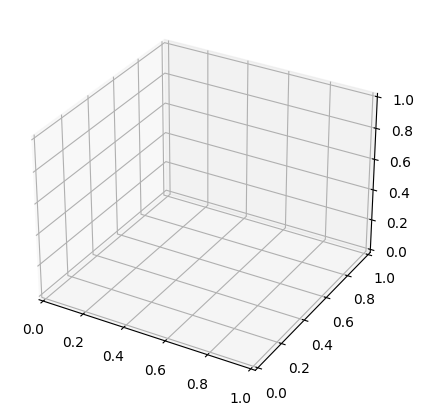

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize clusters in 3D space
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis')#cmap=colormap
ax.set_xlabel('RAM (Scaled)')
ax.set_ylabel('ROM (Scaled)')
ax.set_zlabel('Display Size (Scaled)')
ax.set_title('K-means Clustering')
plt.show()


In [ ]:
df['Cluster'] = cluster_labels

In [ ]:
df
#Cluster 0: Mid-range smartphones with moderate specifications and prices.
#Cluster 1: High-end smartphones with higher specifications and prices.
#Cluster 2: Budget or entry-level smartphones with lower specifications and prices.

,Product Name,Prices,Description,Reviews,RAM,ROM,Display Size,Cluster
0,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,8.0,128.0,17.02,0
1,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2,8.0,128.0,16.51,0
2,POCO C51 - Locked with Airtel Prepaid (Power B...,4999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.0,4.0,64.0,16.56,0
3,"Nothing Phone (2a) 5G (Black, 128 GB)",23999.0,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,4.4,8.0,128.0,17.02,0
4,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,4.2,8.0,128.0,16.51,0
...,...,...,...,...,...,...,...,...
163,"realme 12+ 5G (Pioneer Green, 256 GB)",21999.0,8 GB RAM | 256 GB ROM | Expandable Upto 2 TB16...,4.3,8.0,256.0,16.94,1
164,KARBONN k9 jumbo,1350.0,16 GB RAM | 16 GB ROM6.1 cm (2.4 inch) Display...,4.1,16.0,16.0,6.10,2
165,"OnePlus Nord 3 5G (Misty Green, 128 GB)",24065.0,8 GB RAM | 128 GB ROM17.12 cm (6.74 inch) Disp...,4.4,8.0,128.0,17.12,0
166,"REDMI 12 5G (Pastel Blue, 128 GB)",12718.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,4.3,6.0,128.0,17.25,0
